In [281]:
import pandas as pd
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 

#Read in the data
features = pd.read_csv('filtered_1.csv')
features.drop(['stop_sequence', 'route_id','Origin','Destination'], axis = 1, inplace = True)
features.head(5)

,0-3,3-6,6-9,9-12,12-15,15-18,18-21,21-24,monday,tuesday,wednesday,thursday,friday,saturday,sunday,delay
0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1.0
1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0.0
2,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.0
3,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,NaN
4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0.0


In [282]:
features.dtypes

0-3            int64
3-6            int64
6-9            int64
9-12           int64
12-15          int64
15-18          int64
18-21          int64
21-24          int64
monday         int64
tuesday        int64
wednesday      int64
thursday       int64
friday         int64
saturday       int64
sunday         int64
delay        float64
dtype: object

In [283]:
features = features.dropna()

In [284]:
# Numpy to convert to arrays
import numpy as np


#Remove labels from features
# Axis 1 means colums
X = features.drop('delay', axis = 1)

#Labels are values we want to predict
y = features['delay']

# Saving features names for later use
feature_list = list(X.columns)

# Converting features to numpy array
#features = np.array(features)

print(feature_list)

['0-3', '3-6', '6-9', '9-12', '12-15', '15-18', '18-21', '21-24', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']


In [285]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
                                                    random_state = 42)


In [286]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [287]:
# Testing data with the predict model
predictions = rf.predict(X_test)

# Calculation of absolute errors
errors = abs(predictions - y_test)

# Mean absolute error
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees')

Mean Absolute Error: 7.29 degrees


In [288]:
print(feature_list)

['0-3', '3-6', '6-9', '9-12', '12-15', '15-18', '18-21', '21-24', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']


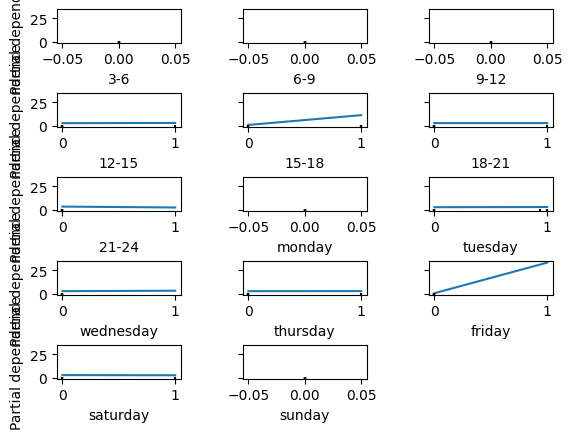

In [289]:
from sklearn.inspection import PartialDependenceDisplay
sketch_for = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
PartialDependenceDisplay.from_estimator(rf, X_train,sketch_for)

plt.subplots_adjust(wspace=0.5, hspace=1.5)

plt.show()

C:\Users\bhatt\AppData\Roaming\Python\Python311\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\bhatt\AppData\Roaming\Python\Python311\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\bhatt\AppData\Roaming\Python\Python311\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent 

Intercept 82.71533649310437
Prediction_local [4.35238769]
Right: 0.991659027256127


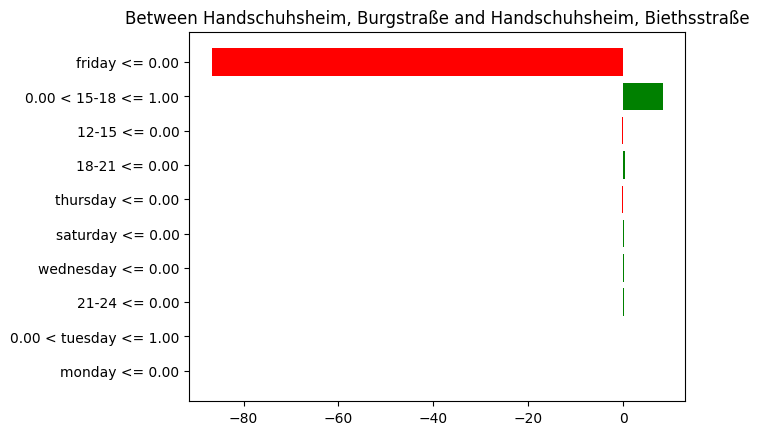

In [290]:
import lime
import lime.lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names = feature_list,
                                                  class_names=['delay'], verbose=True, mode='regression')
exp = explainer.explain_instance(X_test.iloc[0], rf.predict)
exp.as_pyplot_figure()

plt.title('Between Handschuhsheim, Burgstraße and Handschuhsheim, Biethsstraße')
plt.show()

In [291]:

import shap

shap.initjs()

explainer = shap.TreeExplainer(rf)


In [292]:
sample = X_test
shap_values = explainer.shap_values(sample)

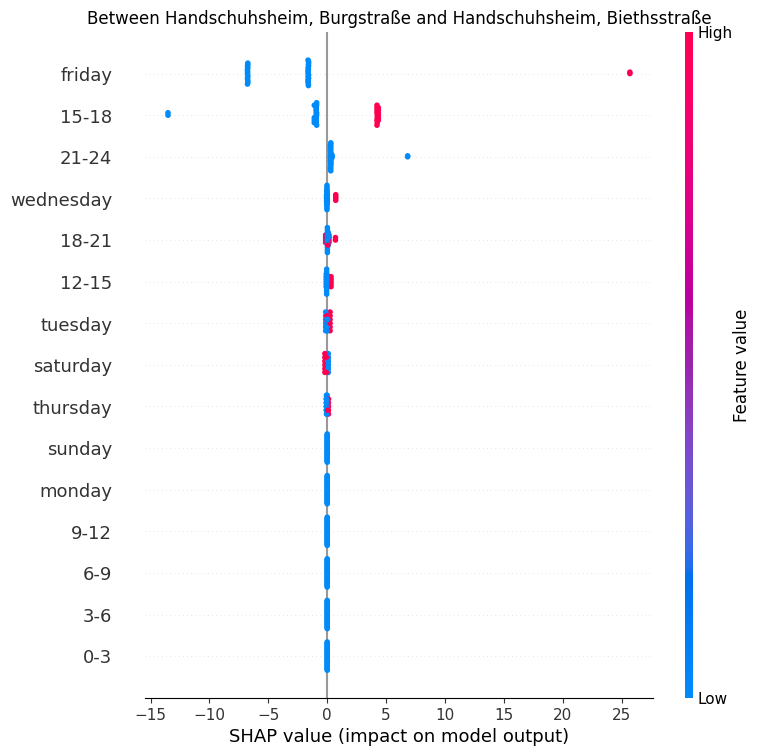

In [293]:
shap.summary_plot(shap_values, sample, show=False)
plt.title("Between Handschuhsheim, Burgstraße and Handschuhsheim, Biethsstraße")
plt.show()